In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import glob 
import os 
import pickle 
from scipy.spatial.transform import Rotation as R 

In [2]:
# Set equal scaling
def set_axes_equal(ax):
    """Set 3D plot axes to have equal scale."""
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    y_range = abs(y_limits[1] - y_limits[0])
    # z_range = abs(z_limits[1] - z_limits[0])

    max_range = max(x_range, y_range)

    x_middle = np.mean(x_limits)
    y_middle = np.mean(y_limits)
    # z_middle = np.mean(z_limits)

    ax.set_xlim3d([x_middle - max_range / 2, x_middle + max_range / 2])
    ax.set_ylim3d([y_middle - max_range / 2, y_middle + max_range / 2])
    # ax.set_zlim3d([z_middle - max_range / 2, z_middle + max_range / 2])

In [3]:
# read data 
# dir_results = "/media/rp/Elements/abhay_ws/mujoco_contact_graph_generation/results/plug_3_pin_data_v2" 
dir_results = "/media/rp/Elements/abhay_ws/mujoco_contact_graph_generation/results/cross_peg_data_v1" 
dir_pkl = dir_results + "/pkl" 
dir_save = dir_pkl.removesuffix("pkl") + "processed_data"
pose_boundary_df = pd.read_csv(os.path.join(dir_save, "pose_boundary_data.csv")) 
print(len(pose_boundary_df)) 

2132788


In [43]:
flag_filter = True   
filter_dimensions = ['x','y','a','b','c'] 
# find the mean and std of the data 
mean_data = pose_boundary_df[filter_dimensions].mean(axis=0)
std_data = pose_boundary_df[filter_dimensions].std(axis=0)

# filter data to 2 standard deviations from the mean 
if flag_filter: 
    # pose_boundary_df = pose_boundary_df[(pose_boundary_df[filter_dimensions] > mean_data - 2*std_data).all(axis=1)]
    # pose_boundary_df = pose_boundary_df[(pose_boundary_df[filter_dimensions] < mean_data + 2*std_data).all(axis=1)] 
    pose_boundary_df = pose_boundary_df[pose_boundary_df['z'] < 14.0] 

In [44]:
# cross-sectional plot 

dimension_filters = {
    "x": [-0.1, +0.1],
    "y": [-0.05, +0.05], 
    "z": [-float('inf'), +float('inf')],
    "a": [-float('inf'), +float('inf')], 
    "b": [-float('inf'), +float('inf')], 
    "c": [-float('inf'), +float('inf')], 
}

# filter data 
pose_boundary_df_filtered = pose_boundary_df.copy()
for dim, bounds in dimension_filters.items():
    pose_boundary_df_filtered = pose_boundary_df_filtered[(pose_boundary_df_filtered[dim] >= bounds[0]) & (pose_boundary_df_filtered[dim] <= bounds[1])] 

# number of filtered data points 
print(f"Number of filtered data points: {pose_boundary_df_filtered.shape[0]}") 

max_points_plot = 100_000
pose_boundary_df_filtered = pose_boundary_df_filtered.sample(n=min(max_points_plot, pose_boundary_df_filtered.shape[0])) 

# plot_dimensions = ["x", "y", "a", "c"]
plot_dimensions = ["a", "b", "c", "x"] 
# 3d plot of 2d manifold 
%matplotlib qt 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
# ax.scatter(pose_boundary_df_filtered[plot_dimensions[0]], pose_boundary_df_filtered[plot_dimensions[1]], pose_boundary_df_filtered[plot_dimensions[2]], s=1) 
sc = ax.scatter(pose_boundary_df_filtered[plot_dimensions[0]], pose_boundary_df_filtered[plot_dimensions[1]], pose_boundary_df_filtered[plot_dimensions[2]], s=1, c=pose_boundary_df_filtered[plot_dimensions[3]], cmap='viridis')  
cbar = plt.colorbar(sc)
cbar.set_label(plot_dimensions[3])
ax.set_xlabel(plot_dimensions[0]) 
ax.set_ylabel(plot_dimensions[1]) 
ax.set_zlabel(plot_dimensions[2]) 
# set_axes_equal(ax)
plt.show() 

Number of filtered data points: 174492


In [45]:
# full dimensional plot 

dimension_filters = {
    "x": [-float('inf'), +float('inf')],
    "y": [-float('inf'), +float('inf')],
    "z": [-float('inf'), +float('inf')],
    "a": [-float('inf'), +float('inf')], 
    "b": [-float('inf'), +float('inf')], 
    "c": [-float('inf'), +float('inf')], 
}

# filter data 
pose_boundary_df_filtered = pose_boundary_df.copy()
# for dim, bounds in dimension_filters.items():
#     pose_boundary_df_filtered = pose_boundary_df_filtered[pose_boundary_df_filtered[dim] >= pose_boundary_df_filtered[dim].mean() - 2*pose_boundary_df_filtered[dim].std()]
#     pose_boundary_df_filtered = pose_boundary_df_filtered[pose_boundary_df_filtered[dim] <= pose_boundary_df_filtered[dim].mean() + 2*pose_boundary_df_filtered[dim].std()]
#     pose_boundary_df_filtered = pose_boundary_df_filtered[(pose_boundary_df_filtered[dim] >= bounds[0]) & (pose_boundary_df_filtered[dim] <= bounds[1])] 

# number of filtered data points 
print(f"Number of filtered data points: {pose_boundary_df_filtered.shape[0]}") 

max_points_plot = 100_000
pose_boundary_df_filtered = pose_boundary_df_filtered.sample(n=min(max_points_plot, pose_boundary_df_filtered.shape[0])) 


Number of filtered data points: 1831210


(array([  4.,   7.,   9.,  14.,  17.,  25.,  24.,  33.,  42.,  49.,  51.,
         83., 100., 100., 100.,  99., 101., 100., 100., 100., 100., 100.,
        100.,  85., 100.,  96.,  99., 101., 100.,  86., 101.,  88., 100.,
        101., 100., 100.,  97., 100.,  96.,  99.,  94., 100.,  79.,  97.,
         96.,  98.,  92., 100.,  85.,  73.,  88.,  67.,  87.,  86.,  76.,
         76.,  65.,  75.,  77.,  80.,  71.,  57.,  77.,  66.,  54.,  96.,
         73.,  75.,  58.,  57.,  67.,  55.,  64.,  58.,  53.,  47.,  57.,
         49.,  46.,  55.,  39.,  61.,  53.,  55.,  55.,  65.,  51.,  40.,
         46.,  47.,  39.,  58.,  44.,  41.,  60.,  47.,  54.,  77.,  99.,
        102.]),
 array([-2.51333988, -2.34823994, -2.18314   , -2.01804006, -1.85294012,
        -1.68784017, -1.52274023, -1.35764029, -1.19254035, -1.02744041,
        -0.86234047, -0.69724053, -0.53214059, -0.36704065, -0.20194071,
        -0.03684076,  0.12825918,  0.29335912,  0.45845906,  0.623559  ,
         0.78865894,  0.95

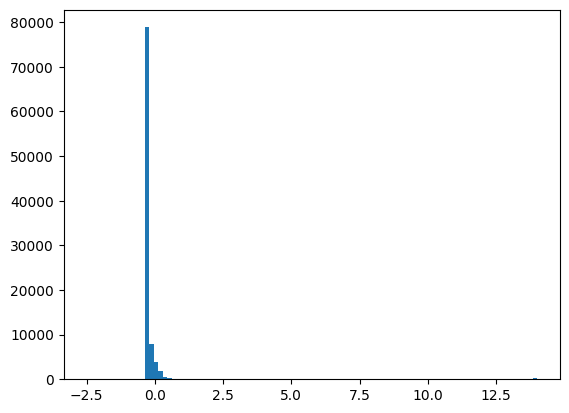

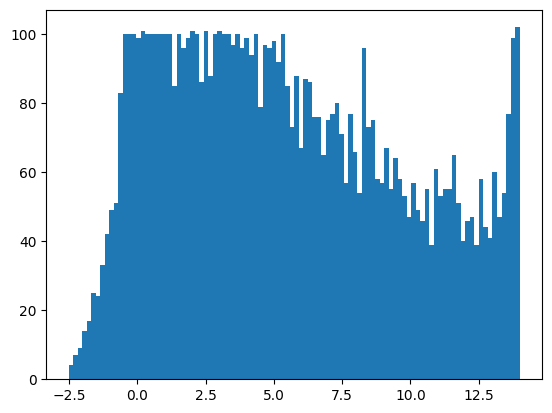

In [46]:
%matplotlib inline 

N_bins = 100 
z_data = pose_boundary_df_filtered['z'].values  
N_map_points = 10_000 
N_points_per_bin = N_map_points // N_bins 

# plot distribution of z 
plt.figure()
plt.hist(z_data, bins=N_bins) 
# plt.ylim([0, 1E5])

# compute bin edges 
bin_edges = np.linspace(min(z_data), max(z_data), N_bins+1) 
idx_sample = [] 

for i in range(N_bins): 
    bin_min = bin_edges[i] 
    bin_max = bin_edges[i+1] 
    idx = np.where((z_data >= bin_min) & (z_data < bin_max))[0] 
    idx_bin_sample = np.random.choice(idx, min(N_points_per_bin,len(idx)), replace=False) 
    idx_sample.extend(idx_bin_sample) 

df_map_z_sampled = pose_boundary_df_filtered.iloc[idx_sample]  

plt.figure()
plt.hist(df_map_z_sampled['z'], bins=N_bins) 

In [47]:
# full dimensional plot 

# x = pose_boundary_df_filtered['x'].values 
# y = pose_boundary_df_filtered['y'].values 
# z = pose_boundary_df_filtered['z'].values 
# a = pose_boundary_df_filtered['a'].values 
# b = pose_boundary_df_filtered['b'].values 
# c = pose_boundary_df_filtered['c'].values 

x = df_map_z_sampled['x'].values 
y = df_map_z_sampled['y'].values 
z = df_map_z_sampled['z'].values 
a = df_map_z_sampled['a'].values 
b = df_map_z_sampled['b'].values 
c = df_map_z_sampled['c'].values 

# linearly rescale angles to -pi to pi 
a_rescale = ((a - min(a))/(max(a) - min(a)) * 2*np.pi) - np.pi  
b_rescale = ((b - min(b))/(max(b) - min(b)) * 2*np.pi) - np.pi  
c_rescale = ((c - min(c))/(max(c) - min(c)) * 2*np.pi) - np.pi  

# convert euler angles to rotation matrices 
rotations = []
x_axis = []
y_axis = []
z_axis = []  
for i in range(len(a_rescale)): 
    r = R.from_euler('xyz', [c_rescale[i], b_rescale[i], a_rescale[i]], degrees=False).as_matrix()  
    rotations.append(r) 
    x_axis.append(r[:,0])
    y_axis.append(r[:,1])
    z_axis.append(r[:,2]) 

x_axis = np.array(x_axis) 
y_axis = np.array(y_axis) 
z_axis = np.array(z_axis) 

In [48]:
# 3d plot of 2d manifold 
%matplotlib qt 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
sc = ax.scatter(x, y, z, c=a, cmap='viridis', s=0.01)  
cbar = plt.colorbar(sc)
cbar.set_label('a') 
q = ax.quiver(x, y, z, z_axis[:,0], z_axis[:,1], z_axis[:,2], cmap='viridis', length=0.1, normalize=True, linewidth=10.0)
q.set_array(np.abs(a))
ax.set_xlabel(plot_dimensions[0]) 
ax.set_ylabel(plot_dimensions[1]) 
ax.set_zlabel(plot_dimensions[2]) 
plt.show() 

In [49]:
# 3 xyz plots colored by a,b,c 
%matplotlib qt 
fig = plt.figure() 

point_size = 1.0 

ax0 = fig.add_subplot(1,3,1, projection='3d') 
sc = ax0.scatter(x, y, z, c=a, cmap='turbo', s=point_size)  
cbar = plt.colorbar(sc)
cbar.set_label('a') 
ax0.set_xlabel(plot_dimensions[0]) 
ax0.set_ylabel(plot_dimensions[1]) 
ax0.set_zlabel(plot_dimensions[2]) 

ax1 = fig.add_subplot(1,3,2, projection='3d') 
sc = ax1.scatter(x, y, z, c=b, cmap='turbo', s=point_size)  
cbar = plt.colorbar(sc)
cbar.set_label('b') 
ax1.set_xlabel(plot_dimensions[0]) 
ax1.set_ylabel(plot_dimensions[1]) 
ax1.set_zlabel(plot_dimensions[2]) 

ax2 = fig.add_subplot(1,3,3, projection='3d') 
sc = ax2.scatter(x, y, z, c=c, cmap='turbo', s=point_size)  
cbar = plt.colorbar(sc)
cbar.set_label('c') 
ax2.set_xlabel(plot_dimensions[0]) 
ax2.set_ylabel(plot_dimensions[1]) 
ax2.set_zlabel(plot_dimensions[2]) 

def on_move(event):
    if event.inaxes == ax0:
        ax1.view_init(elev=ax0.elev, azim=ax0.azim)
        ax2.view_init(elev=ax0.elev, azim=ax0.azim)
        xlim = ax0.get_xlim()
        ylim = ax0.get_ylim()
        zlim = ax0.get_zlim()
        ax1.set_xlim(xlim)
        ax1.set_ylim(ylim)
        ax1.set_zlim(zlim)
        ax2.set_xlim(xlim)
        ax2.set_ylim(ylim)
        ax2.set_zlim(zlim)
    if event.inaxes == ax1:
        ax0.view_init(elev=ax1.elev, azim=ax1.azim)
        ax2.view_init(elev=ax1.elev, azim=ax1.azim)
        xlim = ax1.get_xlim()
        ylim = ax1.get_ylim()
        zlim = ax1.get_zlim()
        ax0.set_xlim(xlim)
        ax0.set_ylim(ylim)
        ax0.set_zlim(zlim)
        ax2.set_xlim(xlim)
        ax2.set_ylim(ylim)
        ax2.set_zlim(zlim)
    elif event.inaxes == ax2:
        ax0.view_init(elev=ax2.elev, azim=ax2.azim)
        ax1.view_init(elev=ax2.elev, azim=ax2.azim)
        xlim = ax2.get_xlim()
        ylim = ax2.get_ylim()
        zlim = ax2.get_zlim()
        ax0.set_xlim(xlim)
        ax0.set_ylim(ylim)
        ax0.set_zlim(zlim)
        ax1.set_xlim(xlim)
        ax1.set_ylim(ylim)
        ax1.set_zlim(zlim)
    plt.draw()


# Connect the callback
fig.canvas.mpl_connect('motion_notify_event', on_move)
plt.tight_layout()
plt.show() 